In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from sklearn.metrics import accuracy_score
dataframe = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')


In [55]:
dataframe.head(10)

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2.0,29.0,11.9,22.0,2.7,3.4,37.0,56.0,95.0,0.58,...,64.7,154.0,48.5,33.5,0.0,111.0,4.0,19.074620,360.0,0.0
1,2.0,35.0,7.3,22.0,1.7,4.0,46.0,72.0,137.0,0.46,...,64.7,154.0,48.5,33.5,0.0,102.0,2.0,22.327528,240.0,0.0
2,2.0,50.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,165.0,4.0,34.258774,660.0,1.0
3,1.0,24.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,123.0,3.0,24.924109,120.0,1.0
4,2.0,42.0,14.5,10.0,5.0,4.0,50.0,74.0,165.0,0.56,...,64.7,154.0,48.5,33.5,0.0,0.0,2.0,38.852821,300.0,1.0
5,1.0,20.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,115.0,5.0,30.041143,430.0,1.0
6,2.0,25.0,14.5,15.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,101.0,4.0,37.507062,300.0,1.0
7,2.0,23.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,113.0,5.0,26.229298,780.0,1.0
8,1.0,52.0,14.2,22.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,151.0,4.0,35.895275,105.0,1.0
9,1.0,44.0,15.3,17.0,4.8,4.0,34.0,86.0,139.0,0.58,...,64.7,154.0,48.5,33.5,0.0,0.0,3.0,27.681502,240.0,1.0


In [57]:
dataframe.describe()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
count,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,...,3.634000e+03,3634.0,3634.0,3634.0,3634.0,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000
mean,1.601195,40.564861,14.241808,21.493366,4.777575,3.910272,35.777488,87.007974,142.820567,0.607560,...,6.470000e+01,154.0,48.5,33.5,0.0,116.270844,3.226811,26.403406,521.131067,0.500000
std,0.467393,11.850057,1.089160,2.775534,0.717994,0.383715,6.455958,15.136159,24.790561,0.176263,...,4.008013e-12,0.0,0.0,0.0,0.0,19.936028,1.936184,5.641145,700.921864,0.500069
min,1.000000,4.000000,5.500000,6.000000,1.100000,1.500000,13.000000,11.000000,44.000000,0.200000,...,6.470000e+01,154.0,48.5,33.5,0.0,0.000000,1.000000,8.873830,10.000000,0.000000
25%,1.000000,31.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,104.273009,2.092972,22.440850,269.734141,0.000000
50%,2.000000,42.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,115.000000,3.124798,25.641138,420.000000,0.500000
75%,2.000000,50.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,126.000000,4.000000,29.647358,607.746318,1.000000
max,2.000000,88.000000,19.900000,35.000000,11.000000,5.200000,114.000000,303.000000,681.000000,8.270000,...,6.470000e+01,154.0,48.5,33.5,0.0,200.000000,99.000000,60.513476,17820.000000,1.000000


In [59]:
dataframe.groupby('riesgo_hipertension').size()

riesgo_hipertension
0.0    1817
1.0    1817
dtype: int64

In [61]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3634 entries, 0 to 3633
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   sexo                              3634 non-null   float64
 1   edad                              3634 non-null   float64
 2   concentracion_hemoglobina         3634 non-null   float64
 3   temperatura_ambiente              3634 non-null   float64
 4   valor_acido_urico                 3634 non-null   float64
 5   valor_albumina                    3634 non-null   float64
 6   valor_colesterol_hdl              3634 non-null   float64
 7   valor_colesterol_ldl              3634 non-null   float64
 8   valor_colesterol_total            3634 non-null   float64
 9   valor_creatina                    3634 non-null   float64
 10  resultado_glucosa                 3634 non-null   float64
 11  valor_insulina                    3634 non-null   float64
 12  valor_

In [63]:
dataframe.describe()

,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,valor_creatina,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
count,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000,...,3.634000e+03,3634.0,3634.0,3634.0,3634.0,3634.000000,3634.000000,3634.000000,3634.000000,3634.000000
mean,1.601195,40.564861,14.241808,21.493366,4.777575,3.910272,35.777488,87.007974,142.820567,0.607560,...,6.470000e+01,154.0,48.5,33.5,0.0,116.270844,3.226811,26.403406,521.131067,0.500000
std,0.467393,11.850057,1.089160,2.775534,0.717994,0.383715,6.455958,15.136159,24.790561,0.176263,...,4.008013e-12,0.0,0.0,0.0,0.0,19.936028,1.936184,5.641145,700.921864,0.500069
min,1.000000,4.000000,5.500000,6.000000,1.100000,1.500000,13.000000,11.000000,44.000000,0.200000,...,6.470000e+01,154.0,48.5,33.5,0.0,0.000000,1.000000,8.873830,10.000000,0.000000
25%,1.000000,31.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,104.273009,2.092972,22.440850,269.734141,0.000000
50%,2.000000,42.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,115.000000,3.124798,25.641138,420.000000,0.500000
75%,2.000000,50.000000,14.200000,22.000000,4.800000,4.000000,34.000000,86.000000,139.000000,0.580000,...,6.470000e+01,154.0,48.5,33.5,0.0,126.000000,4.000000,29.647358,607.746318,1.000000
max,2.000000,88.000000,19.900000,35.000000,11.000000,5.200000,114.000000,303.000000,681.000000,8.270000,...,6.470000e+01,154.0,48.5,33.5,0.0,200.000000,99.000000,60.513476,17820.000000,1.000000


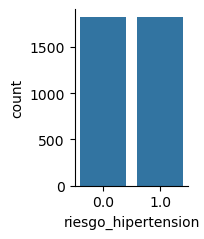

In [65]:
import seaborn as sb
sb.catplot(x = 'riesgo_hipertension',data=dataframe,kind="count", height=2.5, aspect=.8)

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Cargar el dataset balanceado
balanced_data = pd.read_csv('Hipertension_Arterial_Mexico_balanced.csv')

# Separar características y variable objetivo
y = balanced_data['riesgo_hipertension']
x = balanced_data.drop('riesgo_hipertension', axis=1)

# Dividir en entrenamiento y prueba (si necesitas una nueva partición)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Entrenar un modelo
model = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42)
model.fit(x_train, y_train)

# Evaluar
predicciones = model.predict(x_test)
clasificadores = {0: "Sin riesgo", 1: "Con riesgo"}
target_names = list(clasificadores.values())
print("Reporte de clasificación:")
print(classification_report(y_test, predicciones, target_names=target_names))


Reporte de clasificación:
              precision    recall  f1-score   support

  Sin riesgo       0.99      0.98      0.99       528
  Con riesgo       0.98      0.99      0.99       563

    accuracy                           0.99      1091
   macro avg       0.99      0.99      0.99      1091
weighted avg       0.99      0.99      0.99      1091



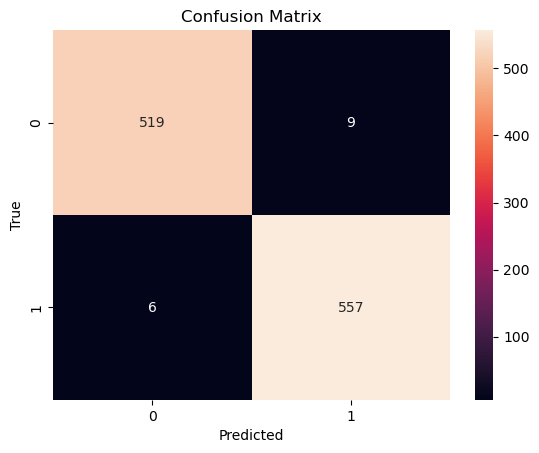

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predicciones), annot=True, fmt="d", xticklabels=clasificadores, yticklabels=clasificadores)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show();

In [71]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [73]:
from flask import Flask, jsonify, request
from threading import Thread
import time
app = Flask(__name__)

try:
    with open('model.pkl', 'rb') as f:
        model = pickle.load(f)
    print("Modelo cargado correctamente")
except Exception as e:
    print("Error al cargar el modelo:", str(e))
    modelo = None

@app.route('/predict', methods=['POST'])
def predict():
    try:
        req_json = request.get_json()
        print("Datos recibidos en la API:", req_json)
        input_data = pd.DataFrame(req_json)
        print("DataFrame creado:", input_data.to_dict())
    except Exception as e:
        print("Error al procesar JSON:", str(e))
        return jsonify({'error': str(e)}), 400

    if input_data.empty:
        print("Error: DataFrame vacío")
        return jsonify({'error': 'No data provided'}), 400

    expected_columns = ['sexo','edad','concentracion_hemoglobina','temperatura_ambiente','valor_acido_urico','valor_albumina','valor_colesterol_hdl','valor_colesterol_ldl','valor_colesterol_total','valor_creatina','resultado_glucosa','valor_insulina','valor_trigliceridos','resultado_glucosa_promedio','valor_hemoglobina_glucosilada','valor_ferritina','valor_folato','valor_homocisteina','valor_proteinac_reactiva','valor_transferrina','valor_vitamina_bdoce','valor_vitamina_d','peso','estatura','medida_cintura','segundamedicion_peso','segundamedicion_estatura','distancia_rodilla_talon','circunferencia_de_la_pantorrilla','segundamedicion_cintura','tension_arterial','sueno_horas','masa_corporal','actividad_total']
    if not all(col in input_data.columns for col in expected_columns):
        print("Error: Columnas faltantes", input_data.columns.tolist())
        return jsonify({'error': 'Missing required columns'}), 400
    
    try:
        predictions = model.predict(input_data)
        predictions = predictions.astype(int)
        predictions = [clasificadores[pred] for pred in predictions]
        probabilities = model.predict_proba(input_data).tolist()
        print("Predicciones realizadas:", predictions)
    except Exception as e:
        print("Error al hacer predicciones:", str(e))
        return jsonify({'error': 'Prediction failed'}), 500

    response = jsonify({
        'predictions': predictions,
        'probabilities': probabilities
    })
    response.status_code = 200
    print("Respuesta enviada:", response.get_json())
    return response

def run_flask():
    app.run(port=8001, use_reloader=False)

if __name__ == '__main__':
    Thread(target=run_flask).start()
    time.sleep(3)

Modelo cargado correctamente
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8001
Press CTRL+C to quit


In [81]:
test_data = pd.DataFrame({
    'sexo': [1],
    'edad': [41],
    'concentracion_hemoglobina': [10.2],
    'temperatura_ambiente': [20],
    'valor_acido_urico': [4.8],
    'valor_albumina': [4],
    'valor_colesterol_hdl': [30],
    'valor_colesterol_ldl': [86],
    'valor_colesterol_total': [125],
    'valor_creatina': [0.58],
    'resultado_glucosa': [92],
    'valor_insulina': [4],
    'valor_trigliceridos': [120],
    'resultado_glucosa_promedio': [103],
    'valor_hemoglobina_glucosilada': [5.2],
    'valor_ferritina': [2.7],
    'valor_folato': [23.4],
    'valor_homocisteina': [4.9],
    'valor_proteinac_reactiva': [0.02],
    'valor_transferrina': [1.1],
    'valor_vitamina_bdoce': [167],
    'valor_vitamina_d': [20.8],
    'peso': [74.55],
    'estatura': [147.3],
    'medida_cintura': [0],
    'segundamedicion_peso': [64.7],
    'segundamedicion_estatura': [154],
    'distancia_rodilla_talon': [48.5],
    'circunferencia_de_la_pantorrilla': [33.5],
    'segundamedicion_cintura': [0],
    'tension_arterial': [107],
    'sueno_horas': [4],
    'masa_corporal': [31],
    'actividad_total': [120]
})

data_json = test_data.to_json(orient='records')

print("Datos enviados en el POST:")
print(data_json)

headers = {'Content-Type': 'application/json', 'Accept': 'application/json'}

try:
    print("Enviando solicitud POST a http://localhost:8001/predict")
    response = requests.post('http://localhost:8001/predict', data=data_json, headers=headers)
    print('\nConsulta a la API:')
    print('Status:', response.status_code)
    print('Respuesta:', response.json())
except Exception as e:
    print(f"Error al consultar la API: {e}")

Datos enviados en el POST:
[{"sexo":1,"edad":41,"concentracion_hemoglobina":10.2,"temperatura_ambiente":20,"valor_acido_urico":4.8,"valor_albumina":4,"valor_colesterol_hdl":30,"valor_colesterol_ldl":86,"valor_colesterol_total":125,"valor_creatina":0.58,"resultado_glucosa":92,"valor_insulina":4,"valor_trigliceridos":120,"resultado_glucosa_promedio":103,"valor_hemoglobina_glucosilada":5.2,"valor_ferritina":2.7,"valor_folato":23.4,"valor_homocisteina":4.9,"valor_proteinac_reactiva":0.02,"valor_transferrina":1.1,"valor_vitamina_bdoce":167,"valor_vitamina_d":20.8,"peso":74.55,"estatura":147.3,"medida_cintura":0,"segundamedicion_peso":64.7,"segundamedicion_estatura":154,"distancia_rodilla_talon":48.5,"circunferencia_de_la_pantorrilla":33.5,"segundamedicion_cintura":0,"tension_arterial":107,"sueno_horas":4,"masa_corporal":31,"actividad_total":120}]
Enviando solicitud POST a http://localhost:8001/predict


127.0.0.1 - - [12/May/2025 04:27:53] "POST /predict HTTP/1.1" 200 -


Datos recibidos en la API: [{'sexo': 1, 'edad': 41, 'concentracion_hemoglobina': 10.2, 'temperatura_ambiente': 20, 'valor_acido_urico': 4.8, 'valor_albumina': 4, 'valor_colesterol_hdl': 30, 'valor_colesterol_ldl': 86, 'valor_colesterol_total': 125, 'valor_creatina': 0.58, 'resultado_glucosa': 92, 'valor_insulina': 4, 'valor_trigliceridos': 120, 'resultado_glucosa_promedio': 103, 'valor_hemoglobina_glucosilada': 5.2, 'valor_ferritina': 2.7, 'valor_folato': 23.4, 'valor_homocisteina': 4.9, 'valor_proteinac_reactiva': 0.02, 'valor_transferrina': 1.1, 'valor_vitamina_bdoce': 167, 'valor_vitamina_d': 20.8, 'peso': 74.55, 'estatura': 147.3, 'medida_cintura': 0, 'segundamedicion_peso': 64.7, 'segundamedicion_estatura': 154, 'distancia_rodilla_talon': 48.5, 'circunferencia_de_la_pantorrilla': 33.5, 'segundamedicion_cintura': 0, 'tension_arterial': 107, 'sueno_horas': 4, 'masa_corporal': 31, 'actividad_total': 120}]
DataFrame creado: {'sexo': {0: 1}, 'edad': {0: 41}, 'concentracion_hemoglobina'